In [1]:
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys
sys.path.append("../../src")
from scipy.fft import fft
from FeaturesExtractorFromTSD import create_feature_dict_from_tsd
import matplotlib.pyplot as plt
import statistics

In [2]:

path_tds_angles = '../../results/big_dataset/TSD_angles'
folders = [x[0] for x in os.walk(path_tds_angles)]
folders.remove(path_tds_angles)

In [3]:
def smooth_time_series(time_series, window_size):
    smoothed_series = []
    for i in range(len(time_series)):
        lower_bound = max(0, i - window_size)
        upper_bound = min(len(time_series), i + window_size + 1)
        window = time_series[lower_bound:upper_bound]
        average = sum(window) / len(window)
        smoothed_series.append(average)
    return smoothed_series

In [4]:
paths_to_csv = {}

In [5]:
for folder in folders:
    video_name = folder.split('\\')[-1]
    curr_paths_to_csv = [(f[:-4], os.path.join(folder, f)) for f in listdir(folder)]
    paths_to_csv[video_name] = curr_paths_to_csv

In [6]:
names_of_videos = [v for v in paths_to_csv.keys() ]
names_of_videos.sort(key=lambda v: v[::-1])

In [7]:
names_of_videos

['S001C',
 'S002C',
 'S007C',
 'S008C',
 'S009C',
 'S002I',
 'S003I',
 'S005I',
 'S007I',
 'S009I',
 'S001S',
 'S002S',
 'S004S',
 'S007S',
 'S009S']

In [8]:
bow_moving = []
titles = []

In [9]:
for i in range(len(names_of_videos)):
    curr_metric, curr_path = paths_to_csv[names_of_videos[i]][0]
    print(curr_path)
    print(curr_metric)
    title = curr_path.split('/')[-1].split('\\')[1]
    titles.append(title)
    print(title)
    angles = pd.read_csv(curr_path)['angle'].to_list()
    bow_moving.append(angles)

../../results/big_dataset/TSD_angles\S001C\angl_bow_mov.csv
angl_bow_mov
S001C
../../results/big_dataset/TSD_angles\S002C\angl_bow_mov.csv
angl_bow_mov
S002C
../../results/big_dataset/TSD_angles\S007C\angl_bow_mov.csv
angl_bow_mov
S007C
../../results/big_dataset/TSD_angles\S008C\angl_bow_mov.csv
angl_bow_mov
S008C
../../results/big_dataset/TSD_angles\S009C\angl_bow_mov.csv
angl_bow_mov
S009C
../../results/big_dataset/TSD_angles\S002I\angl_bow_mov.csv
angl_bow_mov
S002I
../../results/big_dataset/TSD_angles\S003I\angl_bow_mov.csv
angl_bow_mov
S003I
../../results/big_dataset/TSD_angles\S005I\angl_bow_mov.csv
angl_bow_mov
S005I
../../results/big_dataset/TSD_angles\S007I\angl_bow_mov.csv
angl_bow_mov
S007I
../../results/big_dataset/TSD_angles\S009I\angl_bow_mov.csv
angl_bow_mov
S009I
../../results/big_dataset/TSD_angles\S001S\angl_bow_mov.csv
angl_bow_mov
S001S
../../results/big_dataset/TSD_angles\S002S\angl_bow_mov.csv
angl_bow_mov
S002S
../../results/big_dataset/TSD_angles\S004S\angl_bow_

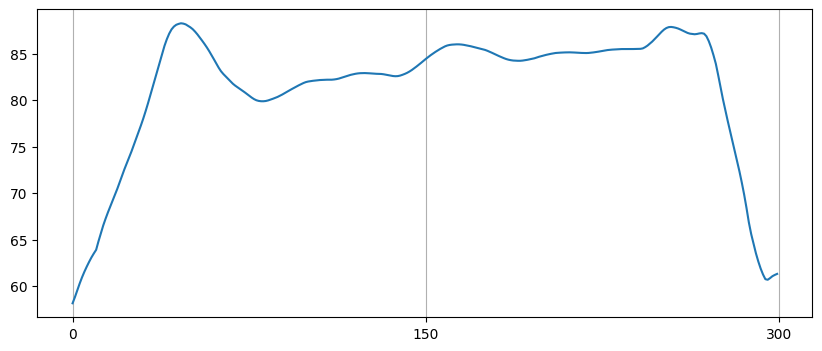

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 6400, 150))
ax.xaxis.grid(True)
ax.plot(smooth_time_series(bow_moving[2][500:800], 10));

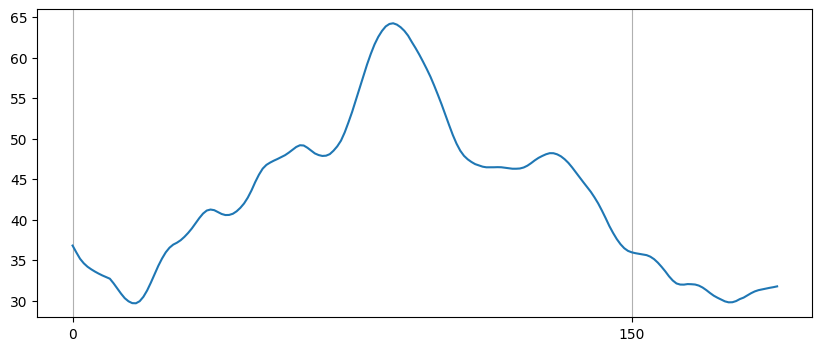

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 6400, 150))
ax.xaxis.grid(True)
ax.plot(smooth_time_series(bow_moving[5][500:690], 10));

In [ ]:
pattern_correct = bow_moving[2][500:800]
pattern_inverted = bow_moving[5][500:690]